# FakeNewsNet - Analysis & Preprocess

You also can check this notebook [here](https://colab.research.google.com/drive/1AnRzfi6rm4aqpUdf7jbi6usrSsuhnEyW?usp=sharing). (New versions will be posted there more often.)

In this notebook, I will try to analyze [news data](https://github.com/KaiDMML/FakeNewsNet). This is the preliminary stage of my scientific work on the prediction of the spread of news and information.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gossipcop_fake = pd.read_csv('/content/drive/MyDrive/FakeNewsNet/gossipcop_fake.csv')
gossipcop_real = pd.read_csv('/content/drive/MyDrive/FakeNewsNet/gossipcop_real.csv')
politifact_fake = pd.read_csv('/content/drive/MyDrive/FakeNewsNet/politifact_fake.csv')
politifact_real = pd.read_csv('/content/drive/MyDrive/FakeNewsNet/politifact_real.csv')

In [ ]:
gossipcop_fake.head()

,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


In [ ]:
gossipcop_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5323 non-null   object
 1   news_url   5067 non-null   object
 2   title      5323 non-null   object
 3   tweet_ids  5135 non-null   object
dtypes: object(4)
memory usage: 166.5+ KB


In [ ]:
gossipcop_real.head()

,id,news_url,title,tweet_ids
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...


In [ ]:
gossipcop_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16817 entries, 0 to 16816
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16817 non-null  object
 1   news_url   16804 non-null  object
 2   title      16817 non-null  object
 3   tweet_ids  15759 non-null  object
dtypes: object(4)
memory usage: 525.7+ KB


In [ ]:
politifact_fake.head()

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [ ]:
politifact_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         432 non-null    object
 1   news_url   428 non-null    object
 2   title      432 non-null    object
 3   tweet_ids  392 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB


In [ ]:
politifact_real.head()

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [ ]:
politifact_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         624 non-null    object
 1   news_url   567 non-null    object
 2   title      624 non-null    object
 3   tweet_ids  409 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


Add a label column, where 1 is real and 0 is fake:

In [ ]:
gossipcop_fake['real'] = 0
gossipcop_real['real'] = 1
politifact_fake['real'] = 0
politifact_real['real'] = 1

All origin dataframes will be combined in one:

In [ ]:
from sklearn.utils import shuffle

data = pd.concat([gossipcop_fake, gossipcop_real, politifact_fake, politifact_real], ignore_index=True)
data = shuffle(data).reset_index(drop=True)
data.head()

,id,news_url,title,tweet_ids,real
0,gossipcop-847212,http://toofab.com/2017/05/08/real-housewives-a...,Kandi Burruss Explodes Over Rape Accusation on...,858851310078218240\t858851791542394880\t858851...,1
1,gossipcop-934514,https://www.today.com/style/see-people-s-choic...,People's Choice Awards 2018: The best red carp...,NaN,1
2,gossipcop-864635,https://www.etonline.com/news/220806_sophia_bu...,Sophia Bush Sends Sweet Birthday Message to 'O...,881624403859173376\t881624640371740672\t881624...,1
3,gossipcop-897341,https://www.dailymail.co.uk/news/article-33655...,Colombian singer Maluma sparks rumours of inap...,937704429201035272\t937705071521001472\t937705...,1
4,gossipcop-880407,https://www.zerchoo.com/entertainment/gossip-g...,Gossip Girl 10 Years Later: How Upper East Sid...,910130193129381888\t910130411426271232\t910131...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         23196 non-null  object
 1   news_url   22866 non-null  object
 2   title      23196 non-null  object
 3   tweet_ids  21695 non-null  object
 4   real       23196 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 906.2+ KB


Extracting source domains from url:

In [ ]:
!pip install tldextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 1.7 MB/s 


In [ ]:
import tldextract

def extract_domain(url):
    try:
        parsed = tldextract.extract(url)
        parsed = ".".join([i for i in parsed if i])
        return parsed
    except:
        return 'NA'

In [ ]:
data.loc[:, 'source_domain'] = data.loc[:, 'news_url'].apply(lambda x: extract_domain(x))
    
data.head()

,id,news_url,title,tweet_ids,real,source_domain
0,gossipcop-847212,http://toofab.com/2017/05/08/real-housewives-a...,Kandi Burruss Explodes Over Rape Accusation on...,858851310078218240\t858851791542394880\t858851...,1,toofab.com
1,gossipcop-934514,https://www.today.com/style/see-people-s-choic...,People's Choice Awards 2018: The best red carp...,NaN,1,www.today.com
2,gossipcop-864635,https://www.etonline.com/news/220806_sophia_bu...,Sophia Bush Sends Sweet Birthday Message to 'O...,881624403859173376\t881624640371740672\t881624...,1,www.etonline.com
3,gossipcop-897341,https://www.dailymail.co.uk/news/article-33655...,Colombian singer Maluma sparks rumours of inap...,937704429201035272\t937705071521001472\t937705...,1,www.dailymail.co.uk
4,gossipcop-880407,https://www.zerchoo.com/entertainment/gossip-g...,Gossip Girl 10 Years Later: How Upper East Sid...,910130193129381888\t910130411426271232\t910131...,1,www.zerchoo.com


Replace tweet_ids on tweet_num:

In [ ]:
def get_count(txt):
    if type(txt) is not str:
        return 0
    else:
        x = txt.split("\t")
        return len(x)

In [ ]:
data.loc[:, 'tweet_num'] = data.loc[:, 'tweet_ids'].apply(lambda x: get_count(x))
    
data.head()

,id,news_url,title,tweet_ids,real,source_domain,tweet_num
0,gossipcop-847212,http://toofab.com/2017/05/08/real-housewives-a...,Kandi Burruss Explodes Over Rape Accusation on...,858851310078218240\t858851791542394880\t858851...,1,toofab.com,42
1,gossipcop-934514,https://www.today.com/style/see-people-s-choic...,People's Choice Awards 2018: The best red carp...,NaN,1,www.today.com,0
2,gossipcop-864635,https://www.etonline.com/news/220806_sophia_bu...,Sophia Bush Sends Sweet Birthday Message to 'O...,881624403859173376\t881624640371740672\t881624...,1,www.etonline.com,63
3,gossipcop-897341,https://www.dailymail.co.uk/news/article-33655...,Colombian singer Maluma sparks rumours of inap...,937704429201035272\t937705071521001472\t937705...,1,www.dailymail.co.uk,20
4,gossipcop-880407,https://www.zerchoo.com/entertainment/gossip-g...,Gossip Girl 10 Years Later: How Upper East Sid...,910130193129381888\t910130411426271232\t910131...,1,www.zerchoo.com,38


Drop id and tweet_ids columns:

In [ ]:
data = data.drop(columns=['id', 'tweet_ids'])
data = data[["title","news_url","source_domain","tweet_num", "real"]]
data.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


# Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  23196 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


Top-10 sources:

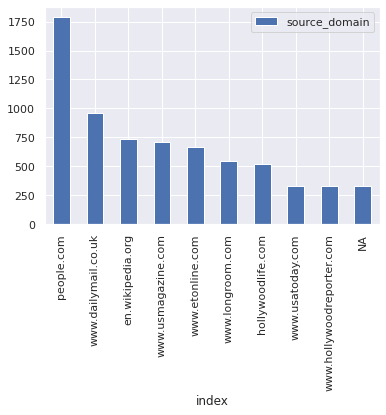

In [ ]:
df_source = data['source_domain'].value_counts(ascending=False).reset_index()
df_source[:10].plot.bar(x='index')

In [ ]:
data['real'].value_counts()

1    17441
0     5755
Name: real, dtype: int64

Сlasses are not balanced.

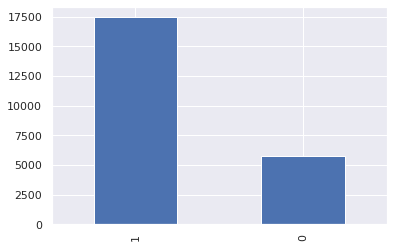

In [ ]:
data['real'].value_counts().plot.bar();

Wordclouds:

In [ ]:
from wordcloud import WordCloud

def make_wordcloud(text):
    wordcloud = WordCloud(width=1000, height=1000).generate(text)
    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

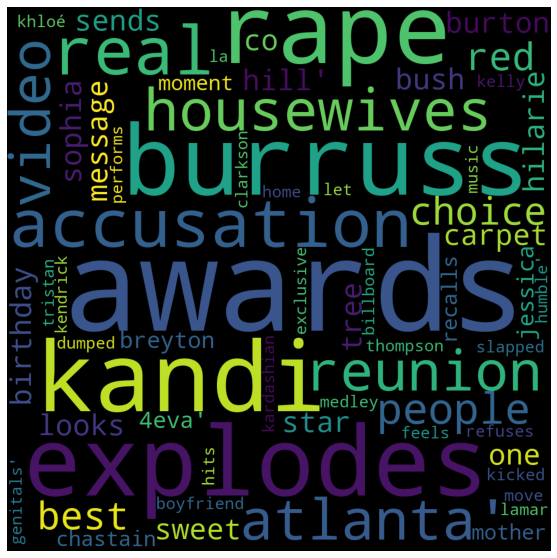

In [ ]:
txt = str(data['title'].values).lower()
make_wordcloud(txt)

Saving the file:

In [ ]:
data.to_csv('FakeNewsNet.csv', index=False)